# Bike Sharing Assignment

#### Problem Statement:

Boombikes is a US based bike-sharing service provider. It is facing difficulties to sustain due to the dips in their revenues because of the pandemic. To overcome the current challenges, they have decided to understand the demand of sharing bikes among the people based on different factors, which will help them to accerlerate their revenue once the lockdown comes to an end.

Essentially, the company wants —

- To variables which are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands.

# Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import numpy and pandas
import numpy as np
import pandas as pd

In [3]:
#Read the dataset
bikes = pd.read_csv('day.csv')

In [4]:
#Checking the head of the dataset
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Checking the number of records in the datasets
bikes.shape

(730, 16)

In [6]:
#Missing value checks
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#Checking the data types and null values in each columns
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#Dropping the instant column, which holds the index value and dteday, which holds date
bikes.drop(['instant', 'dteday'], axis=1, inplace=True)

In [9]:
# Dropping casual and registered columns as cnt columns hold the total number of user
bikes.drop(['casual','registered'], axis=1, inplace=True)

In [10]:
#Number of columns reduced to 12
bikes.shape

(730, 12)

In [11]:
#Mapping the season column as per the data dictionary to get meaningful insights
varlist = ['season']
bikes[varlist] = bikes[varlist].apply(lambda x : x.map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}))

In [12]:
bikes.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [13]:
#Mapping the yr column
yearlist = ['yr']
bikes[yearlist] = bikes[yearlist].apply(lambda x : x.map({0: '2018',1: '2019'}))

In [14]:
bikes.yr.value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [15]:
#Mapping the mnth columns
monthlist = ['mnth']
bikes[monthlist] = bikes[monthlist].apply(lambda x : x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7:'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11:'Nov', 12: 'Dec'}))

In [16]:
bikes.mnth.value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [17]:
#Mapping the weekday column
weekdaylist = ['weekday']
bikes[weekdaylist] = bikes[weekdaylist].apply(lambda x : x.map({1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 0:'Sun'}))

In [18]:
bikes.weekday.value_counts()

Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64

In [19]:
#Mapping the weathersit column
weathersitlist = ['weathersit']
bikes[weathersitlist] = bikes[weathersitlist].apply(lambda x : x.map({1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}))

In [20]:
bikes.weathersit.value_counts()

Clear              463
Mist               246
Light Rain/Snow     21
Name: weathersit, dtype: int64

In [21]:
#Mapping the holiday column
holidaylist = ['holiday']
bikes[holidaylist] = bikes[holidaylist].apply(lambda x : x.map({1: 'Yes', 0: 'No'}))

In [22]:
bikes.holiday.value_counts()

No     709
Yes     21
Name: holiday, dtype: int64

In [23]:
#Mapping the workingday column
workingday_list = ['workingday']
bikes[workingday_list] = bikes[workingday_list].apply(lambda x : x.map({1: 'Yes', 0: 'No'}))

In [24]:
bikes.workingday.value_counts()

Yes    499
No     231
Name: workingday, dtype: int64

In [25]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Sat,No,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,No,Sun,No,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,No,Mon,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,No,Tue,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,No,Wed,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 2: Visualising the Data

In [26]:
#Importing matplotlib and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#Seggregating the columns based on numberical or categorical
num_cols=['temp','atemp','hum','windspeed','cnt']
cat_cols=['season','yr','mnth','weekday','weathersit','holiday','workingday']

## Univariate Analysis

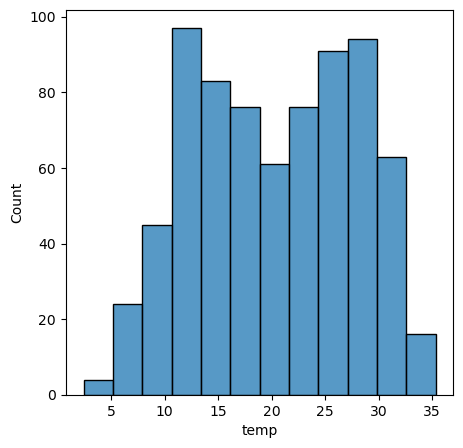

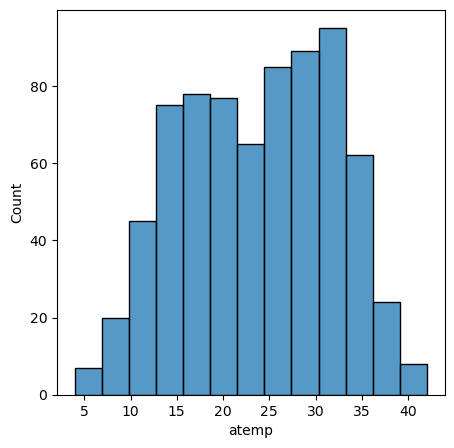

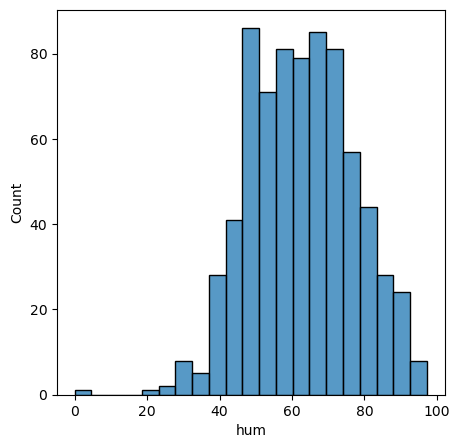

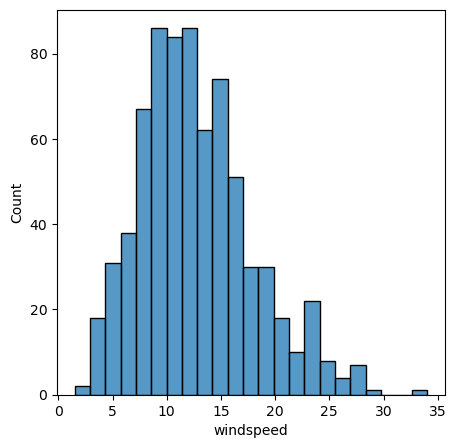

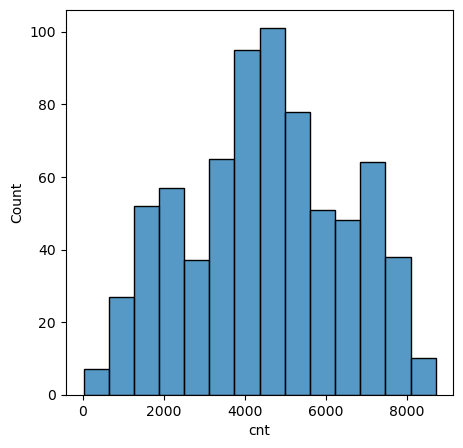

In [28]:
for i in num_cols:
    plt.figure(figsize=(5, 5))
    sns.histplot(bikes[i])
    plt.show()

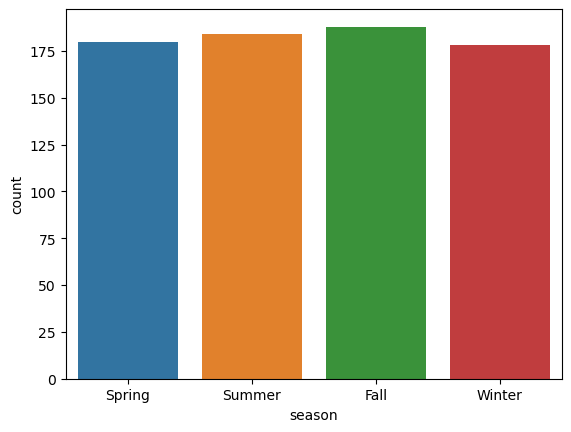

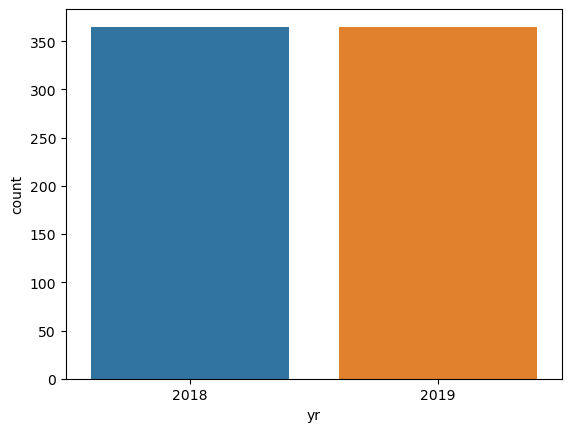

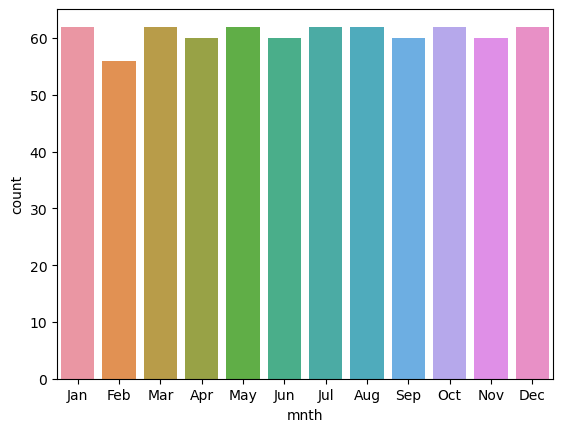

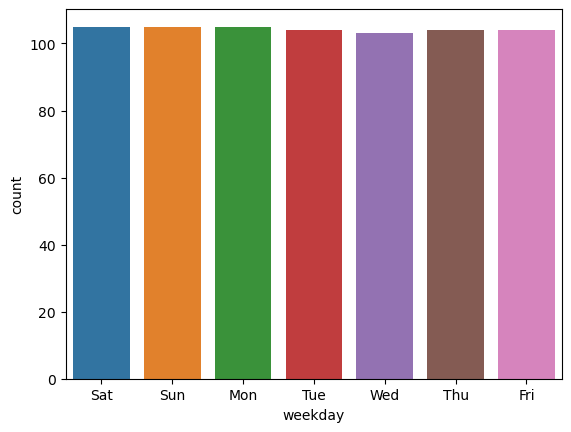

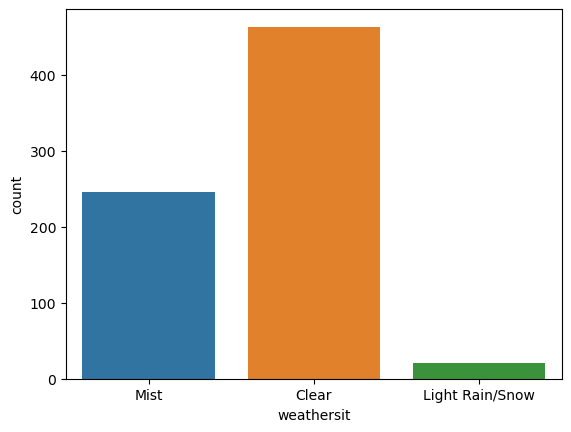

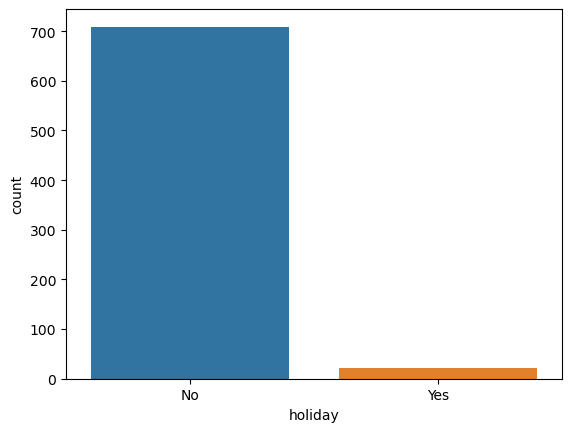

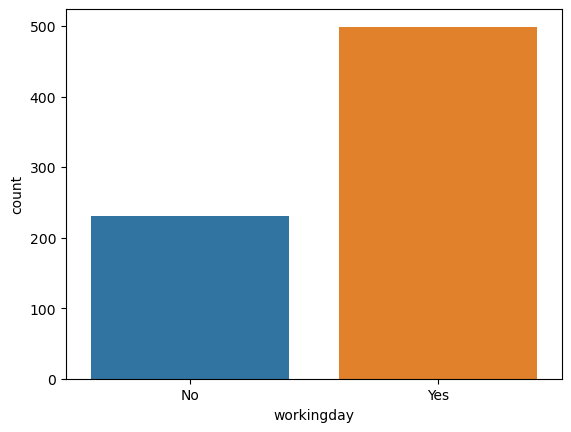

In [29]:
for i in cat_cols:
    sns.countplot(x=bikes[i])
    plt.show()

## Bivariate Analysis

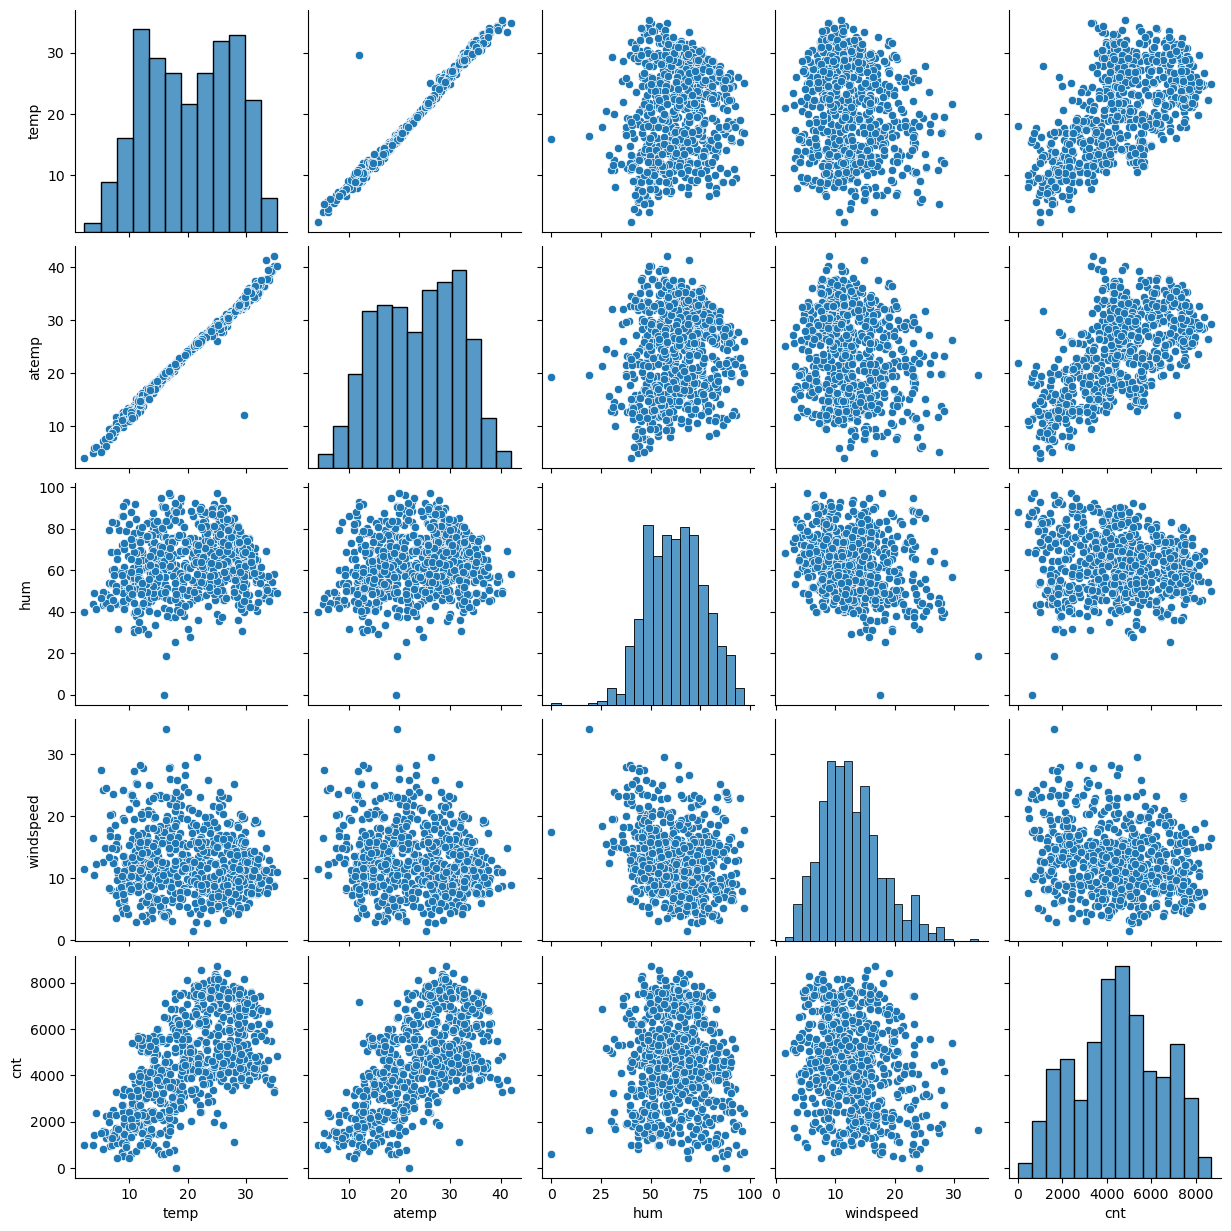

In [30]:
sns.pairplot(bikes)
plt.show()

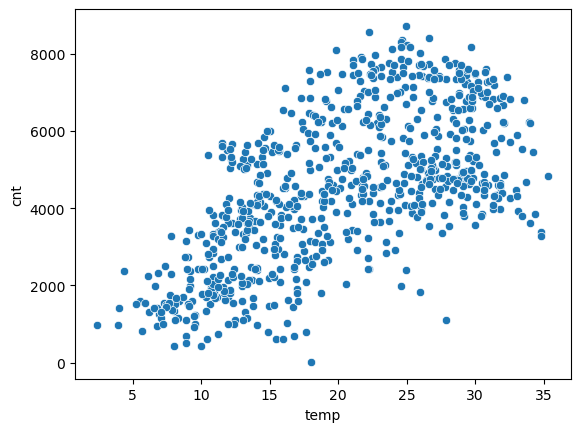

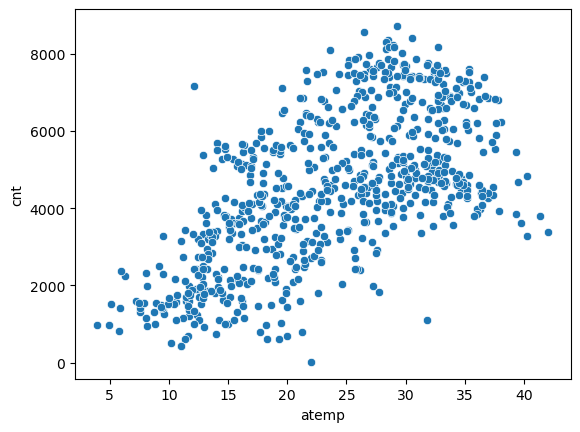

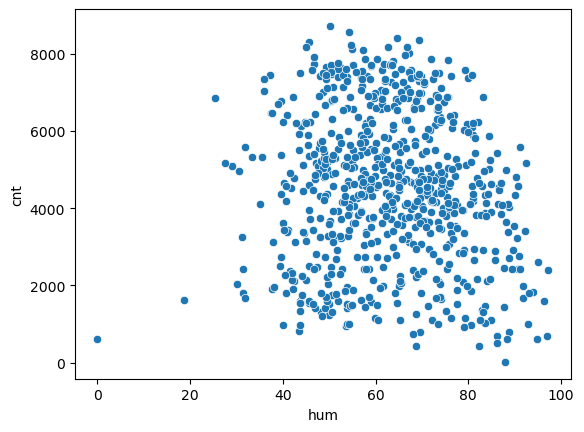

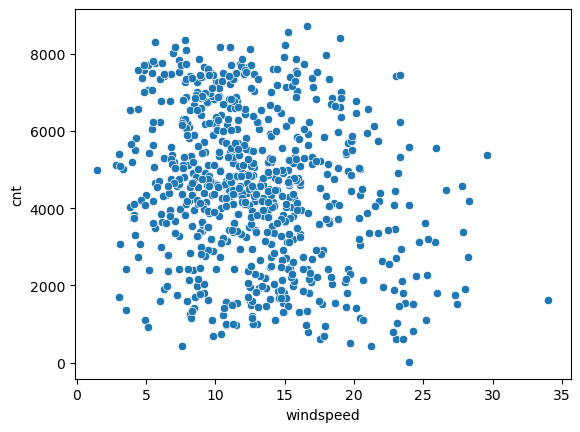

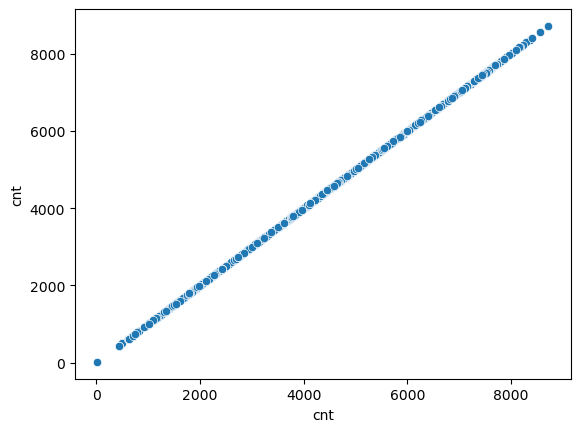

In [31]:
for i in num_cols:
    sns.scatterplot(x=bikes[i],y=bikes["cnt"])
    plt.show()

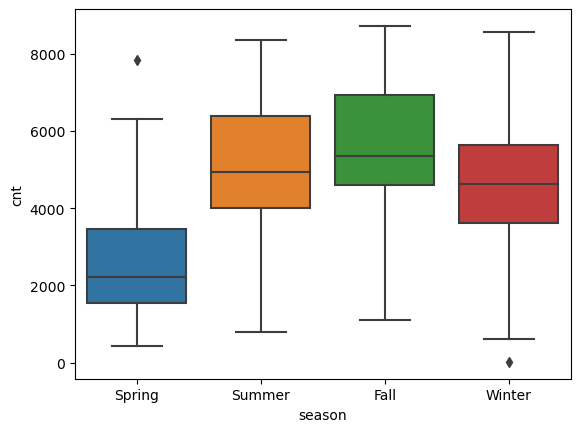

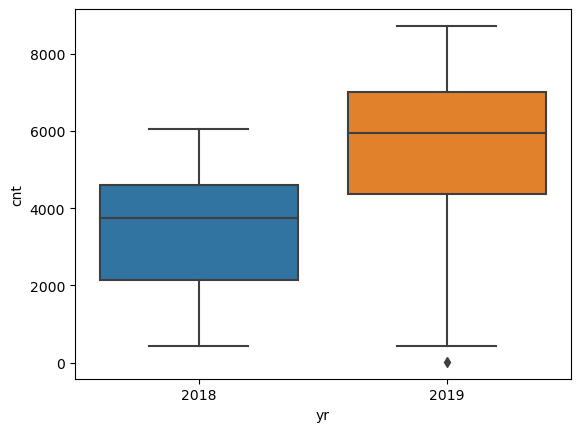

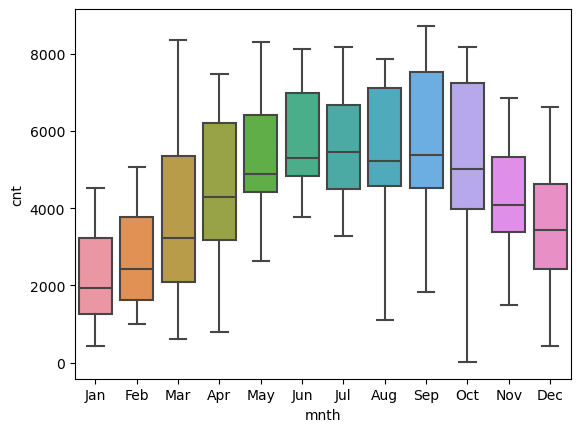

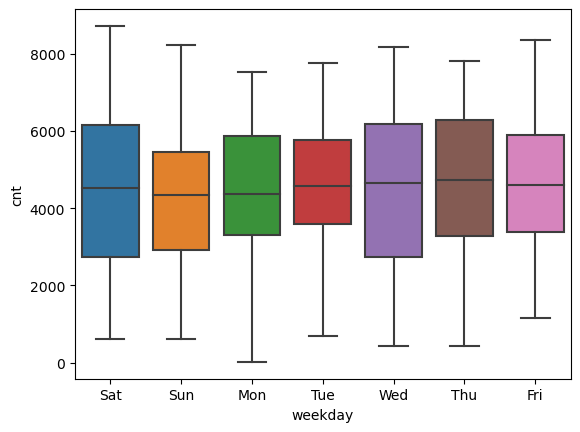

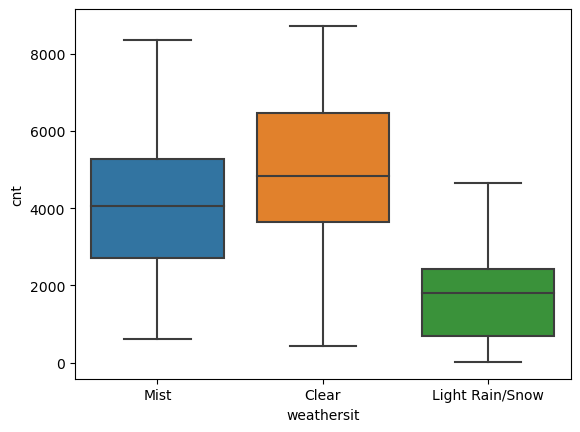

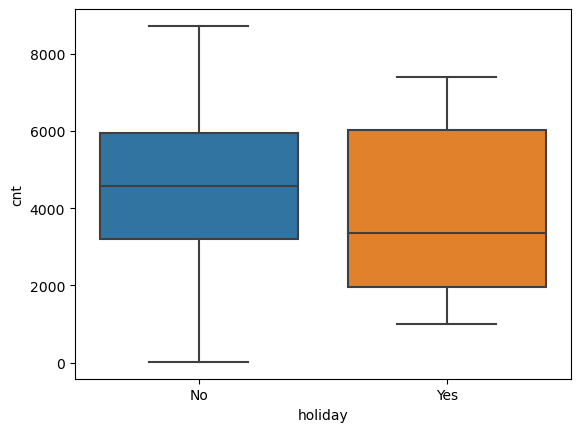

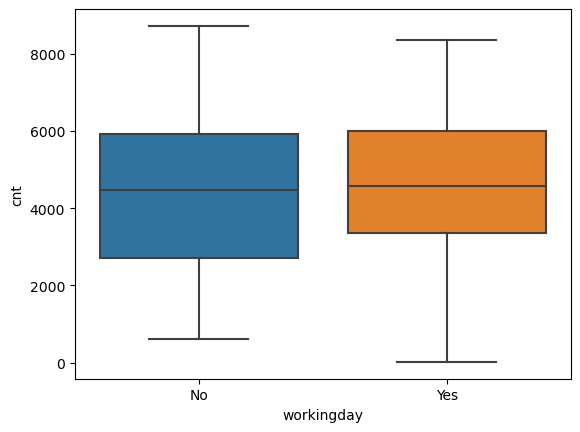

In [32]:
for i in cat_cols:
    sns.boxplot(x=bikes[i],y=bikes["cnt"])
    plt.show()

# Step 3: Data Preprocessing

## Converting variables into binary format

In [33]:
# List of variables to map
col_list =  ['holiday', 'workingday']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
bikes[col_list] = bikes[col_list].apply(binary_map)

In [34]:
year_list = ['yr']
bikes[year_list] = bikes[year_list].apply(lambda x : x.map({'2018': 0,'2019': 1}))

## Dummy Variables

In [35]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'seasons'
#dummies column = n-1, which means column Fall can be identifed by other 3 columns values
seasons = pd.get_dummies(bikes['season'], drop_first = True)

In [36]:
seasons.value_counts()

Spring  Summer  Winter
0       0       0         188
        1       0         184
1       0       0         180
0       0       1         178
dtype: int64

In [37]:
# Add the seasons to the bikes dataframe
bikes = pd.concat([bikes, seasons], axis = 1)

In [38]:
#Dropping the season column, as the other season columns added to the dataframe
bikes.drop(['season'], axis=1, inplace=True)

In [39]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weather'
#dummies column = n-1, which means column Clear can be identifed by other 2 columns values
weather = pd.get_dummies(bikes['weathersit'], drop_first = True)

In [40]:
weather.head()

,Light Rain/Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [41]:
# Add the seasons to the bikes dataframe
bikes = pd.concat([bikes, weather], axis = 1)

In [42]:
#Dropping the season column, as the other season columns added to the dataframe
bikes.drop(['weathersit'], axis=1, inplace=True)

In [43]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'week'
#dummies column = n-1
week = pd.get_dummies(bikes['weekday'], drop_first = True)

In [44]:
week.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [45]:
# Add the week to the bikes dataframe
bikes = pd.concat([bikes, week], axis = 1)

In [46]:
#Dropping the weekday column, as the other season columns added to the dataframe
bikes.drop(['weekday'], axis=1, inplace=True)

In [47]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'month'
#dummies column = n-1
month = pd.get_dummies(bikes['mnth'], drop_first = True)

In [48]:
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [49]:
# Add the month to the bikes dataframe
bikes = pd.concat([bikes, month], axis = 1)

In [50]:
#Dropping the mnth column, as the other month columns added to the dataframe
bikes.drop(['mnth'], axis=1, inplace=True)

In [51]:
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


# Step 4: Splitting the Data into Training and Testing Sets

In [52]:
#importing the library
from sklearn.model_selection import train_test_split

#Splitting the dataframe into 70% for training and 30% for testing
np.random.seed(0)
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, random_state = 100)

In [53]:
#Validating the num of rows and columns in train set
bikes_train.shape

(510, 30)

In [54]:
#Validating the num of rows and columns in test set
bikes_test.shape

(220, 30)

### Rescaling the Features using MinMax

In [55]:
#Rescaling the columns for normalization. So, that the units of the coefficients obtained are all on the same scale.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [56]:
# Apply scaler() to the non-binary and non-dummy variables
col_vars = ['temp','atemp','hum','windspeed','cnt']
bikes_train[col_vars] = scaler.fit_transform(bikes_train[col_vars])

In [57]:
bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#Checking the data post scaling
bikes_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


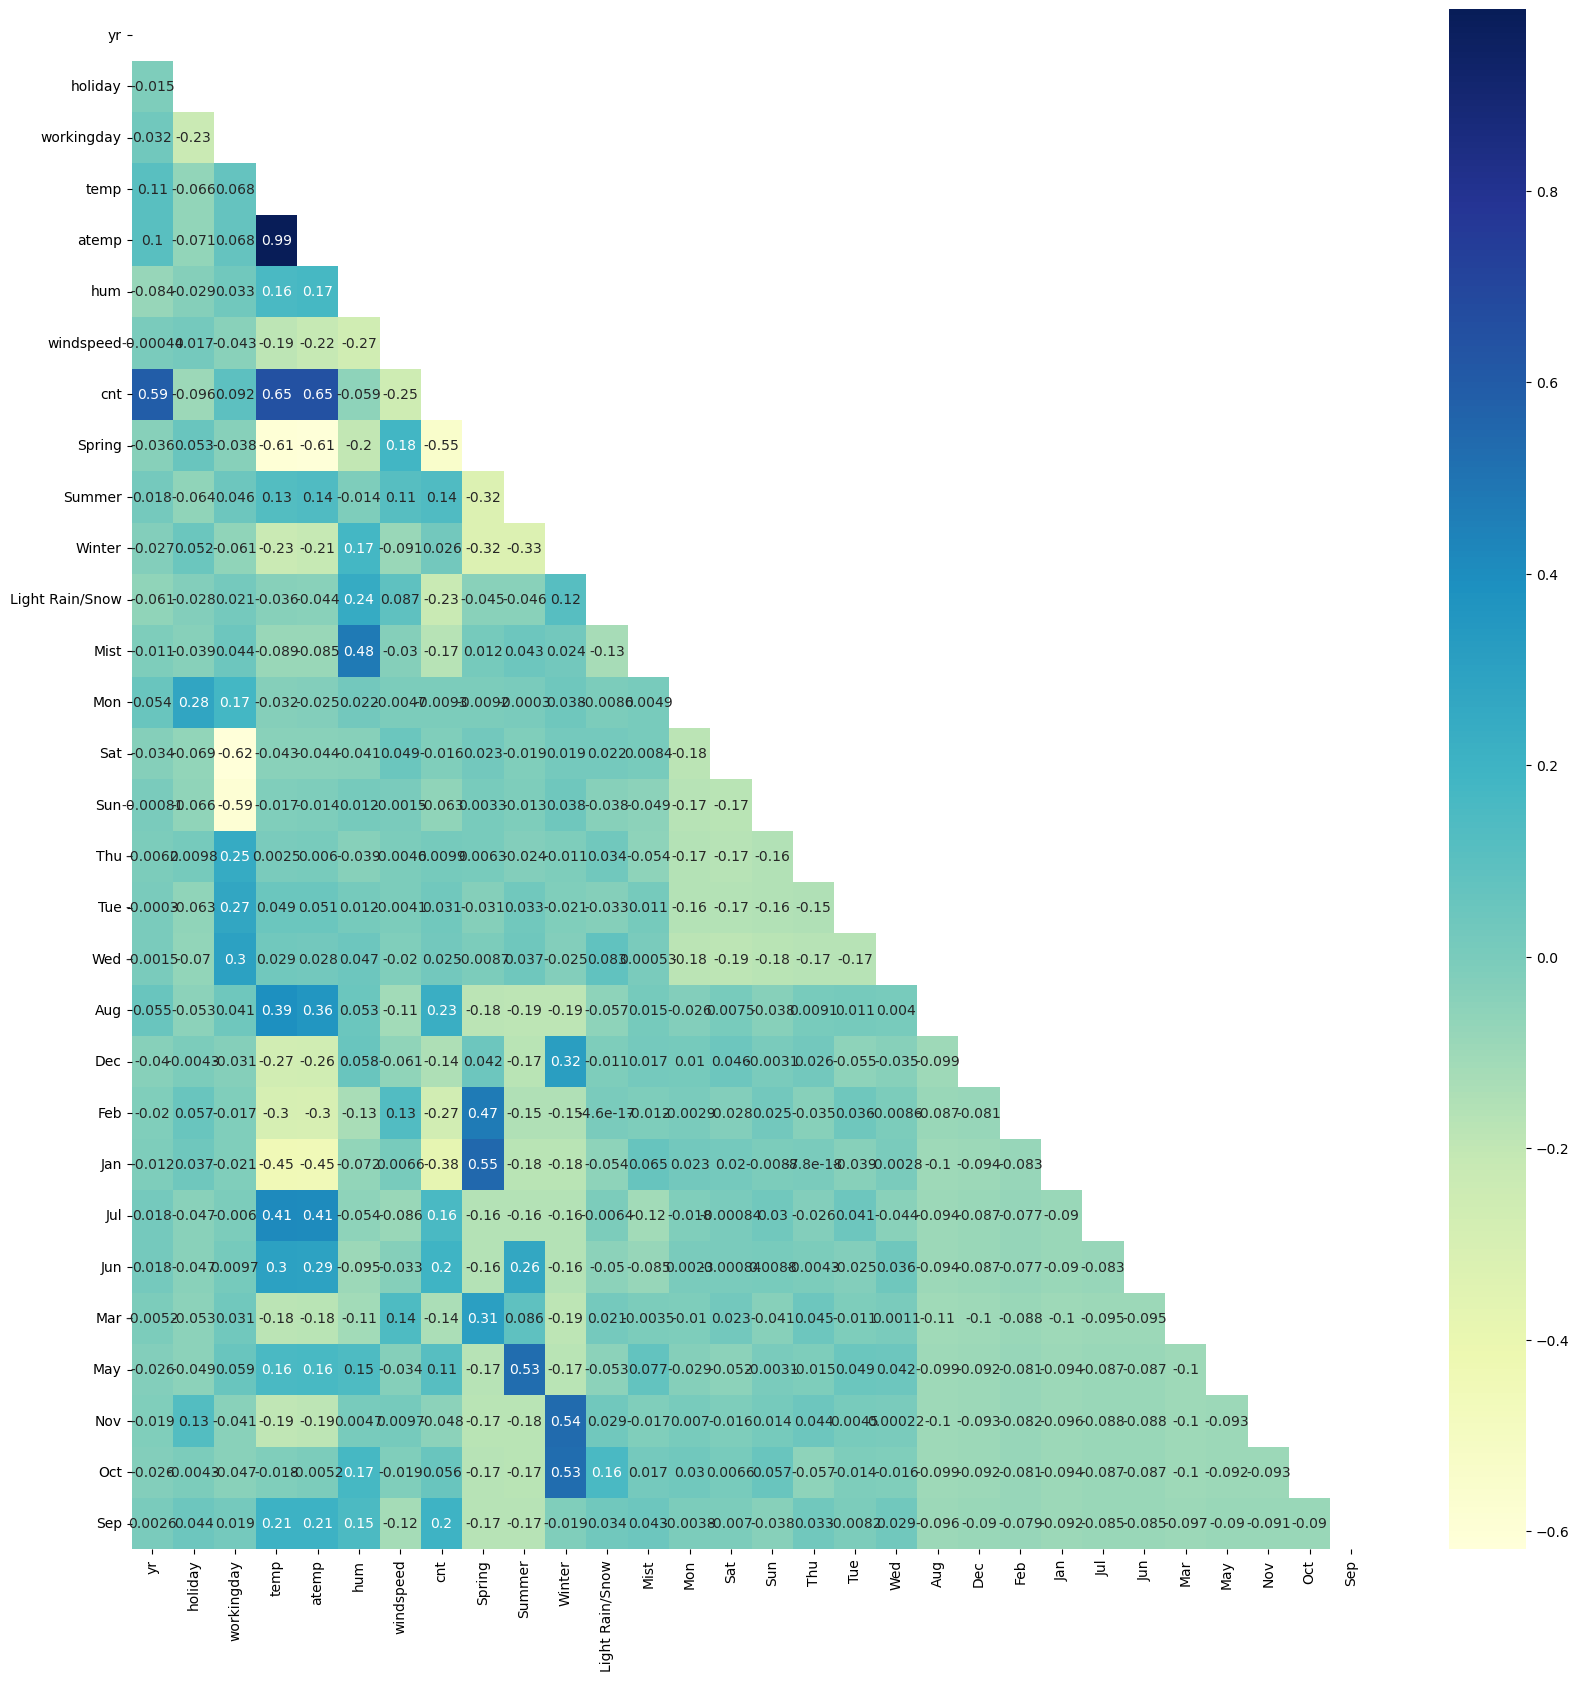

In [59]:
#Check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 20))
matrix = np.triu(bikes_train.corr())
sns.heatmap(bikes_train.corr(), annot = True, cmap="YlGnBu",mask=matrix)
plt.show()

As per the heatmap, below features seems co-related:
1. cnt and yr
2. cnt and temp, atemp
3. wheather with months (like Winter with Oct and Nov, Summer with May, Spring with Jan and Feb)
4. Mist with humidity
5. Jun and July with temp

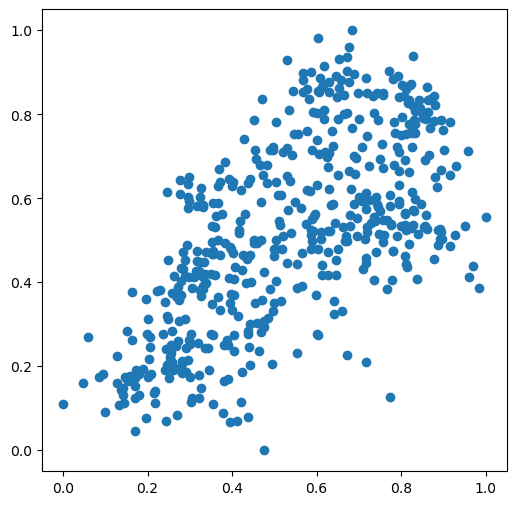

In [60]:
#Let's see a scatter for cnt vs temp, as it shows the highest co-relation
plt.figure(figsize=[6,6])
plt.scatter(bikes_train.temp, bikes_train.cnt)
plt.show()

Pick cnt as the first variable and try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [61]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

### Feature Selection

In [62]:
# Feature selection using Recursive Feature Elimination RFE
# importing libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
estimator.fit(X_train,y_train)
selector=RFE(estimator,n_features_to_select=15)

selector=selector.fit(X_train,y_train)

In [63]:
#Listing the selected features
selected_features=X_train.columns[selector.support_]
selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Light Rain/Snow', 'Mist', 'Sat', 'Jan', 'Jul',
       'Sep'],
      dtype='object')

In [64]:
#updating the dataframes with selected features
X_train=X_train[selected_features]

# Step 5: Building Linear Regression Model

In [65]:
#importing the statsmodel libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
#Adding the constant to statsmodel
X_train_sm=sm.add_constant(X_train)#X_train_sm["const"]=1

In [67]:
# Method to calculate the VIF
def getVIFValues(df):
    vif_data=pd.DataFrame()
    vif_data["Feature"]=df.columns
    vif_data["VIF"]=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
    return vif_data

In [68]:
#Getting VIF values for X_train data set features
getVIFValues(X_train)

,Feature,VIF
0,yr,2.088739
1,holiday,1.176531
2,workingday,5.306978
3,temp,17.780645
4,hum,29.370804
5,windspeed,4.728655
6,Spring,4.531273
7,Summer,2.849835
8,Winter,3.460305
9,Light Rain/Snow,1.244703


In [69]:
#Building 1st model
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          4.22e-191
Time:                        00:46:08   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2519      0.036      6.969      0.000       0.181       0.323
yr                  0.2305      0.008     28.795      0.000       0.215       0.246
holiday            -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday          0.0433      0.012      3.762      0.000       0.021       0.066
temp                0.5096      0.034     14.837      0.000       0.442       0.577
hum                -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed          -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Spring             -0.0509      0.021     -2.464      0.014      -0.091      -0.010
Summer              0.0508      0.015      3.423      0.001       0.022       0.080
Winter              0.0933      0.017      5.403      0.000       0.059       0.127
Light Rain/Snow    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist               -0.0563      0.010     -5.439      0.000      -0.077      -0.036
Sat                 0.0536      0.014      3.694      0.000       0.025       0.082
Jan                -0.0345      0.017     -1.989      0.047      -0.069      -0.000
Jul                -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep                 0.0814      0.016      4.945      0.000       0.049       0.114
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#VIF value of hum is too high, hence dropping it.
X_train_sm=X_train_sm.drop(["hum"],axis=1)
#Recalcuting the VIF
getVIFValues(X_train_sm)

,Feature,VIF
0,const,62.012518
1,yr,1.022917
2,holiday,1.161879
3,workingday,1.873080
4,temp,3.626024
5,windspeed,1.114036
6,Spring,5.029305
7,Summer,2.621805
8,Winter,3.438776
9,Light Rain/Snow,1.054377


In [71]:
#Building 2nd model
model2=sm.OLS(y_train,X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.60e-188
Time:                        00:46:08   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1737      0.031      5.520      0.000       0.112       0.235
yr                  0.2345      0.008     29.009      0.000       0.219       0.250
holiday            -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday          0.0464      0.012      3.966      0.000       0.023       0.069
temp                0.4722      0.034     14.005      0.000       0.406       0.538
windspeed          -0.1563      0.025     -6.286      0.000      -0.205      -0.107
Spring             -0.0599      0.021     -2.867      0.004      -0.101      -0.019
Summer              0.0445      0.015      2.967      0.003       0.015       0.074
Winter              0.0784      0.017      4.562      0.000       0.045       0.112
Light Rain/Snow    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Mist               -0.0813      0.009     -9.437      0.000      -0.098      -0.064
Sat                 0.0583      0.015      3.968      0.000       0.029       0.087
Jan                -0.0392      0.018     -2.227      0.026      -0.074      -0.005
Jul                -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Sep                 0.0755      0.017      4.527      0.000       0.043       0.108
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#VIF value of Spring is greater than 5, hence dropping it.
X_train_sm=X_train_sm.drop(["Spring"],axis=1)
#Recalcuting the VIF
getVIFValues(X_train_sm)

,Feature,VIF
0,const,28.692993
1,yr,1.020718
2,holiday,1.161438
3,workingday,1.872375
4,temp,1.925615
5,windspeed,1.105002
6,Summer,1.412015
7,Winter,1.470859
8,Light Rain/Snow,1.053690
9,Mist,1.048962


In [73]:
#Building 3rd model
model3=sm.OLS(y_train,X_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.6
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          6.40e-188
Time:                        00:46:08   Log-Likelihood:                 506.55
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     496   BIC:                            -925.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1075      0.022      4.989      0.000       0.065       0.150
yr                  0.2334      0.008     28.699      0.000       0.217       0.249
holiday            -0.0573      0.028     -2.083      0.038      -0.111      -0.003
workingday          0.0470      0.012      3.994      0.000       0.024       0.070
temp                0.5384      0.025     21.756      0.000       0.490       0.587
windspeed          -0.1627      0.025     -6.524      0.000      -0.212      -0.114
Summer              0.0737      0.011      6.649      0.000       0.052       0.096
Winter              0.1156      0.011     10.218      0.000       0.093       0.138
Light Rain/Snow    -0.2890      0.024    -11.822      0.000      -0.337      -0.241
Mist               -0.0805      0.009     -9.284      0.000      -0.098      -0.063
Sat                 0.0590      0.015      3.988      0.000       0.030       0.088
Jan                -0.0453      0.018     -2.574      0.010      -0.080      -0.011
Jul                -0.0372      0.018     -2.059      0.040      -0.073      -0.002
Sep                 0.0886      0.016      5.490      0.000       0.057       0.120
==============================================================================
Omnibus:                       60.484   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.921
Skew:                          -0.660   Prob(JB):                     6.14e-29
Kurtosis:                       5.091   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
#P-value of Jul is greater than 0, hence dropping it.
X_train_sm=X_train_sm.drop(["Jul"],axis=1)
#Recalcuting the VIF
getVIFValues(X_train_sm)

,Feature,VIF
0,const,28.518737
1,yr,1.019426
2,holiday,1.160181
3,workingday,1.869805
4,temp,1.610384
5,windspeed,1.104857
6,Summer,1.276559
7,Winter,1.434360
8,Light Rain/Snow,1.053245
9,Mist,1.046049


In [75]:
#Building 4th model
model4=sm.OLS(y_train,X_train_sm)
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.6
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          3.49e-188
Time:                        00:46:08   Log-Likelihood:                 504.38
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     497   BIC:                            -927.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1110      0.022      5.149      0.000       0.069       0.153
yr                  0.2340      0.008     28.697      0.000       0.218       0.250
holiday            -0.0554      0.028     -2.010      0.045      -0.110      -0.001
workingday          0.0479      0.012      4.060      0.000       0.025       0.071
temp                0.5178      0.023     22.805      0.000       0.473       0.562
windspeed          -0.1621      0.025     -6.479      0.000      -0.211      -0.113
Summer              0.0808      0.011      7.639      0.000       0.060       0.102
Winter              0.1193      0.011     10.641      0.000       0.097       0.141
Light Rain/Snow    -0.2901      0.025    -11.828      0.000      -0.338      -0.242
Mist               -0.0795      0.009     -9.159      0.000      -0.097      -0.062
Sat                 0.0594      0.015      4.002      0.000       0.030       0.089
Jan                -0.0460      0.018     -2.605      0.009      -0.081      -0.011
Sep                 0.0971      0.016      6.203      0.000       0.066       0.128
==============================================================================
Omnibus:                       65.098   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.268
Skew:                          -0.705   Prob(JB):                     3.48e-31
Kurtosis:                       5.148   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#P-value of holiday is greater than 0, hence dropping it.
X_train_sm=X_train_sm.drop(["holiday"],axis=1)
#Recalcuting the VIF
getVIFValues(X_train_sm)

,Feature,VIF
0,const,27.306986
1,yr,1.019344
2,workingday,1.645512
3,temp,1.608048
4,windspeed,1.104364
5,Summer,1.275834
6,Winter,1.433778
7,Light Rain/Snow,1.052610
8,Mist,1.045220
9,Sat,1.631868


In [77]:
#Building 5th model
model5=sm.OLS(y_train,X_train_sm)
res5=model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.4
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.65e-188
Time:                        00:46:08   Log-Likelihood:                 502.31
No. Observations:                 510   AIC:                            -980.6
Df Residuals:                     498   BIC:                            -929.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1021      0.021      4.824      0.000       0.060       0.144
yr                  0.2341      0.008     28.629      0.000       0.218       0.250
workingday          0.0561      0.011      5.054      0.000       0.034       0.078
temp                0.5195      0.023     22.828      0.000       0.475       0.564
windspeed          -0.1631      0.025     -6.503      0.000      -0.212      -0.114
Summer              0.0813      0.011      7.666      0.000       0.060       0.102
Winter              0.1188      0.011     10.571      0.000       0.097       0.141
Light Rain/Snow    -0.2888      0.025    -11.747      0.000      -0.337      -0.241
Mist               -0.0791      0.009     -9.078      0.000      -0.096      -0.062
Sat                 0.0677      0.014      4.738      0.000       0.040       0.096
Jan                -0.0466      0.018     -2.633      0.009      -0.081      -0.012
Sep                 0.0952      0.016      6.070      0.000       0.064       0.126
==============================================================================
Omnibus:                       70.097   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.952
Skew:                          -0.741   Prob(JB):                     8.28e-35
Kurtosis:                       5.279   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
#P-value of Jan is greater than 0, hence dropping it.
X_train_sm=X_train_sm.drop(["Jan"],axis=1)
#Recalcuting the VIF
getVIFValues(X_train_sm)

,Feature,VIF
0,const,20.864469
1,yr,1.017192
2,workingday,1.645512
3,temp,1.195186
4,windspeed,1.088394
5,Summer,1.188104
6,Winter,1.205436
7,Light Rain/Snow,1.051835
8,Mist,1.043368
9,Sat,1.631805


In [79]:
#Building 6th model
model6=sm.OLS(y_train,X_train_sm)
res6=model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          3.13e-188
Time:                        00:46:08   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0750      0.019      4.031      0.000       0.038       0.112
yr                  0.2331      0.008     28.370      0.000       0.217       0.249
workingday          0.0561      0.011      5.024      0.000       0.034       0.078
temp                0.5499      0.020     27.861      0.000       0.511       0.589
windspeed          -0.1552      0.025     -6.195      0.000      -0.204      -0.106
Summer              0.0886      0.010      8.608      0.000       0.068       0.109
Winter              0.1307      0.010     12.600      0.000       0.110       0.151
Light Rain/Snow    -0.2871      0.025    -11.611      0.000      -0.336      -0.239
Mist               -0.0800      0.009     -9.143      0.000      -0.097      -0.063
Sat                 0.0675      0.014      4.693      0.000       0.039       0.096
Sep                 0.0974      0.016      6.184      0.000       0.066       0.128
==============================================================================
Omnibus:                       68.639   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.839
Skew:                          -0.731   Prob(JB):                     1.07e-33
Kurtosis:                       5.238   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### res6 is the most significant model achived so far, as the P-value for all features are 0  and VIF is less than 5. It means, multicolineary betweens these features are less. Hence, this model will be used for prediction.

In [80]:
X_train_sm.head()

,const,yr,workingday,temp,windspeed,Summer,Winter,Light Rain/Snow,Mist,Sat,Sep
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,1,1,0
111,1.0,0,1,0.345824,0.380981,1,0,0,1,0,0


# Step 6: Residual Analysis

In [81]:
y_train_pred = res6.predict(X_train_sm)
y_train_pred

576    0.771441
426    0.499266
728    0.340012
482    0.572570
111    0.270763
         ...   
578    0.810313
53     0.225259
350    0.262616
79     0.311902
520    0.647114
Length: 510, dtype: float64

### Normality of Error Terms

<Axes: ylabel='Density'>

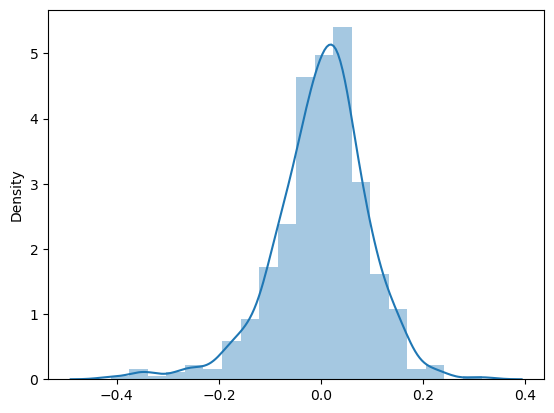

In [82]:
#Checking the error distribution by ploting the histogram
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)

Error terms are following the normal distribution.

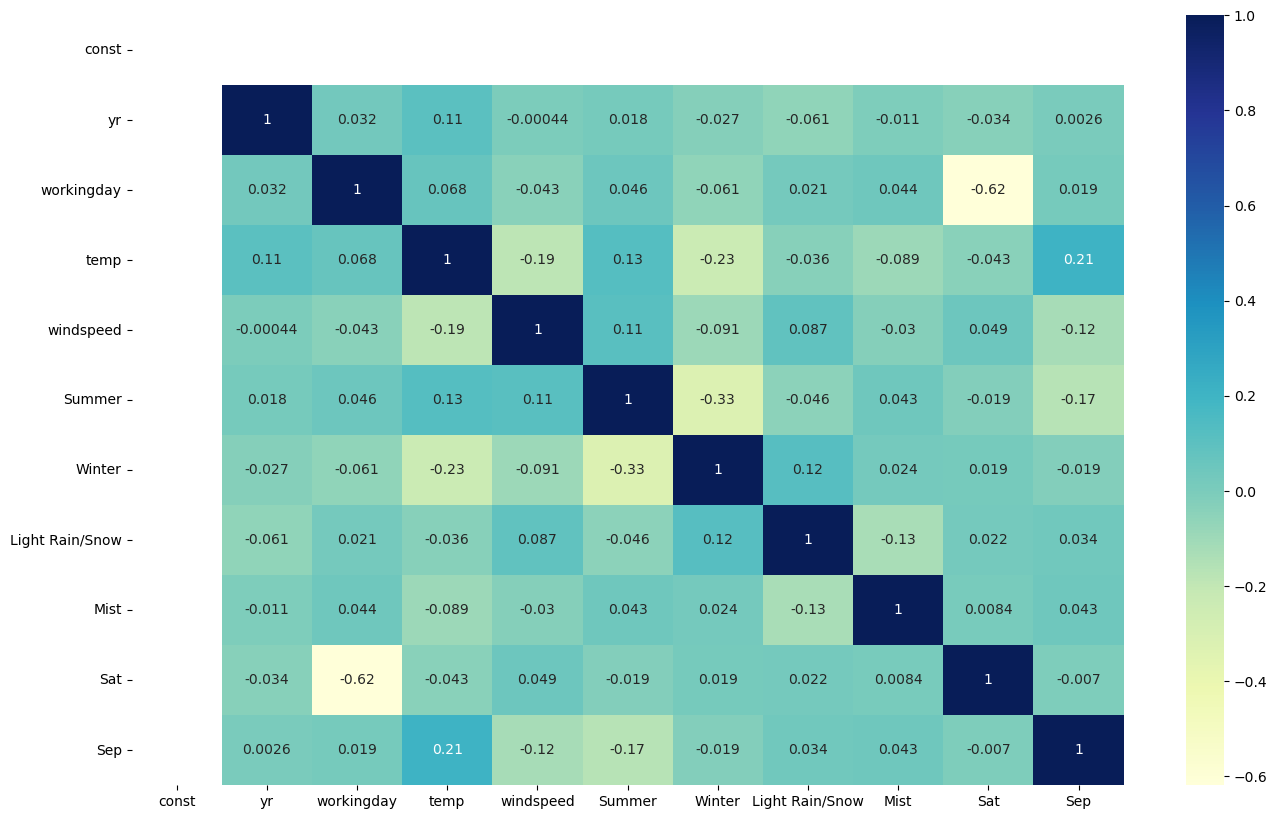

In [83]:
#Check the correlation coefficients on X_train_sm data set
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_sm.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Step 7: Making Predictions on test data set

In [84]:
# Scaling on the test dataset
col_vars = ['temp','atemp','hum','windspeed','cnt']
bikes_test[col_vars] = scaler.transform(bikes_test[col_vars])

In [85]:
bikes_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,1,0,0,0,0,0


### Dividing the test data set into X and Y

In [86]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [87]:
#Updating the features based on the trained data set
features = X_train_sm.columns
features = features[1:]
X_test = X_test[features]
X_test.head()

,yr,workingday,temp,windspeed,Summer,Winter,Light Rain/Snow,Mist,Sat,Sep
184,0,0,0.831783,0.084219,0,0,0,1,0,0
535,1,1,0.901354,0.153728,1,0,0,0,0,0
299,0,1,0.511964,0.334206,0,1,0,1,0,0
221,0,1,0.881625,0.339570,0,0,0,0,0,0
152,0,1,0.817246,0.537414,1,0,0,0,0,0


In [88]:
#Adding constant to test dataframe
X_test = sm.add_constant(X_test)

In [89]:
#Making predcition using final trained model
from sklearn.metrics import r2_score
y_pred = res6.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.7961390438459764

The r2 value on the test data seems close to r2 value on trained data.

In [90]:
# Calculating Adjusted-R^2 value for the test data
adj_r2 = 1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
adj_r2

0.785357935587831

# Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

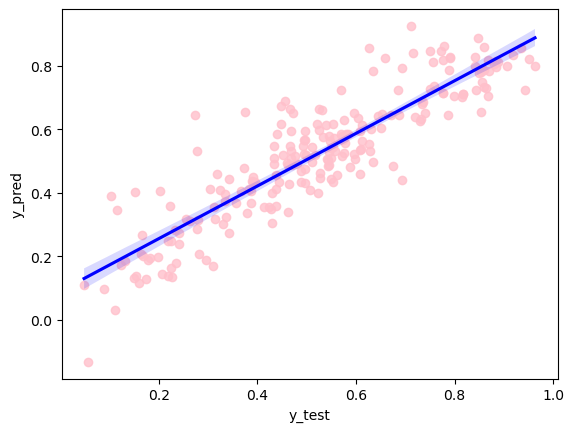

In [91]:
#Plotting the graph on test data set to check the linearity
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, fit_reg=True,scatter_kws={"color": "pink"}, line_kws={"color": "blue"})
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_pred', fontsize = 10) 

### Equation of best fit line

In [92]:
#Printing the co-efficent values for the features cosidered in final model
res6.params

const              0.075009
yr                 0.233139
workingday         0.056117
temp               0.549892
windspeed         -0.155203
Summer             0.088621
Winter             0.130655
Light Rain/Snow   -0.287090
Mist              -0.080022
Sat                0.067500
Sep                0.097365
dtype: float64

Equation of best fit line:

cnt = 0.075009 + yr * 0.233139 + workingday * 0.056117 + temp * 0.549892 - windspeed * 0.155203 + Summer * 0.088621 + 
     Winter * 0.130655 - Light Rain/Snow * 0.287090 - Mist * 0.080022 + Sat * 0.067500 + Sep * 0.097365

### List of features on which bikes demands depends

In [93]:
features

Index(['yr', 'workingday', 'temp', 'windspeed', 'Summer', 'Winter',
       'Light Rain/Snow', 'Mist', 'Sat', 'Sep'],
      dtype='object')

# Summary

1. Trained dataset: R-squared = 0.835 and Adj. R-squared = 0.832
2. Test dataset: R-squared = 0.796 and Adj. R-squared = 0.785